In [1]:
from __future__ import division

import json
import pickle
import pandas as pd
import numpy as np
import math
from scipy.ndimage.interpolation import shift
from matplotlib import style
import matplotlib.pyplot as plt



style.use('ggplot')

{'1': 0, '2': 1, '5': 2, '6': 3, '7': 4, '8': 5, '9': 6, '10': 7, '11': 8, '13': 9, '14': 10, '15': 11, '17': 12, '18': 13, '20': 14, '23': 15, '29': 16, '32': 17, '70': 18, '88': 19, '94': 20}
{0: '1', 1: '2', 2: '5', 3: '6', 4: '7', 5: '8', 6: '9', 7: '10', 8: '11', 9: '13', 10: '14', 11: '15', 12: '17', 13: '18', 14: '20', 15: '23', 16: '29', 17: '32', 18: '70', 19: '88', 20: '94'}


{'1': 0, '3': 1, '5': 2, '7': 3, '8': 4, '9': 5, '11': 6, '14': 7, '17': 8, '18': 9, '20': 10, '22': 11, '23': 12, '24': 13, '25': 14, '28': 15, '30': 16, '35': 17, '70': 18, '77': 19, '90': 20}
{0: '1', 1: '3', 2: '5', 3: '7', 4: '8', 5: '9', 6: '11', 7: '14', 8: '17', 9: '18', 10: '20', 11: '22', 12: '23', 13: '24', 14: '25', 15: '28', 16: '30', 17: '35', 18: '70', 19: '77', 20: '90'}
min: 6.0


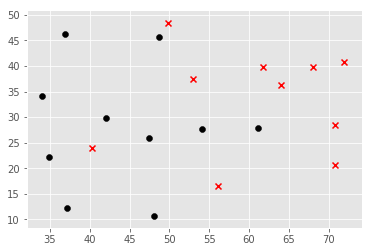



min: 7.0


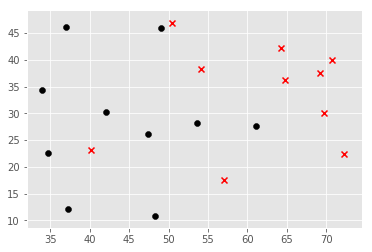



min: 8.0


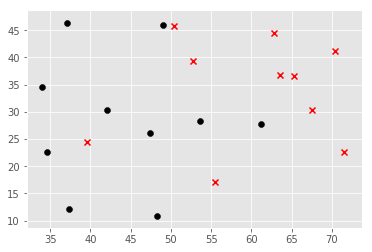



min: 9.0


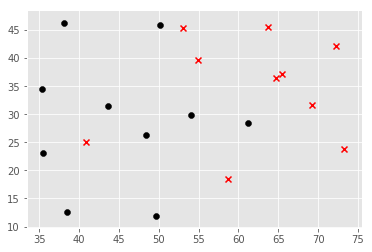



min: 10.0


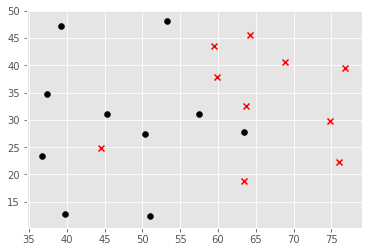



min: 11.0


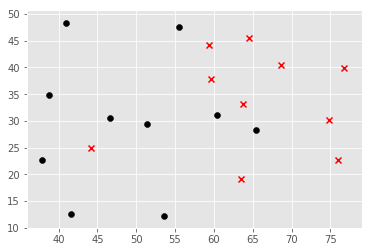



min: 12.0


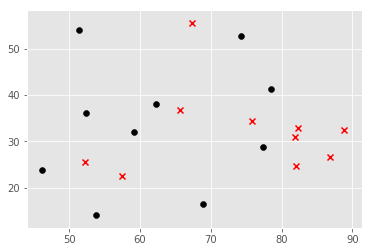



min: 13.0


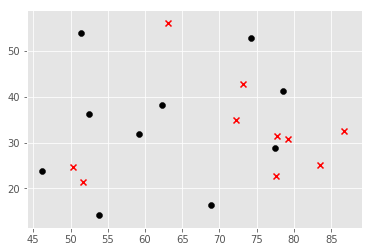



min: 14.0


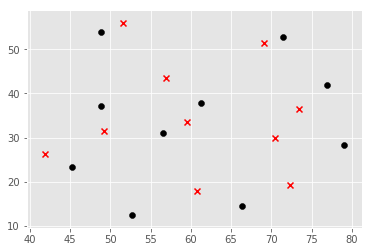



min: 15.0


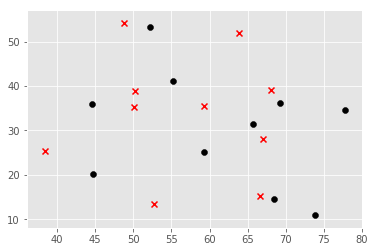



min: 16.0


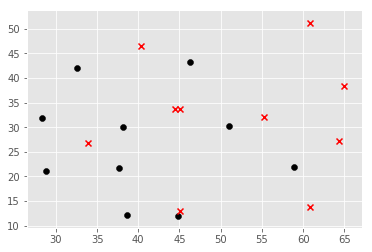



min: 17.0


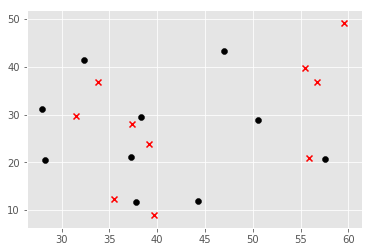



min: 18.0


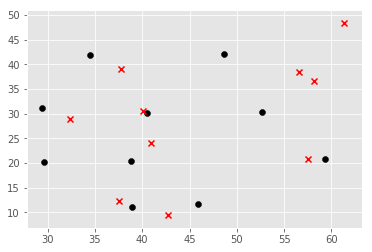



min: 19.0


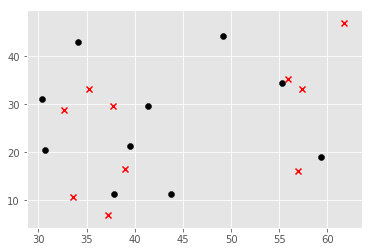



min: 20.0


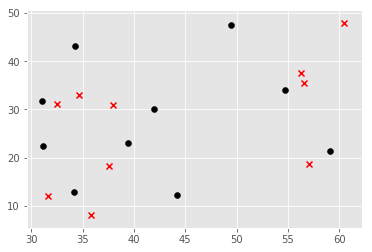



min: 21.0


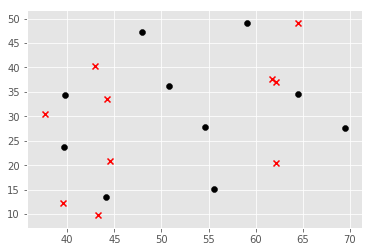



min: 22.0


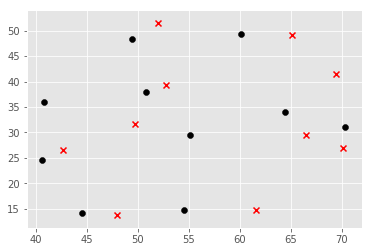



min: 23.0


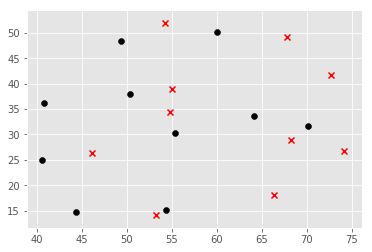



min: 24.0


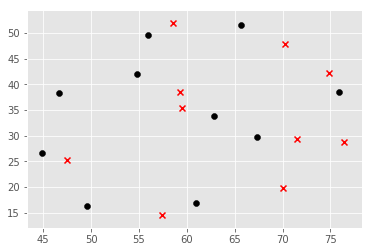



min: 25.0


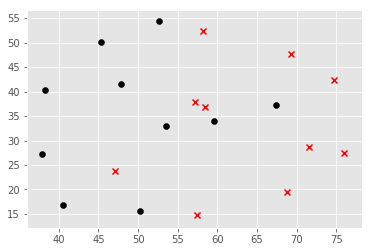



min: 26.0


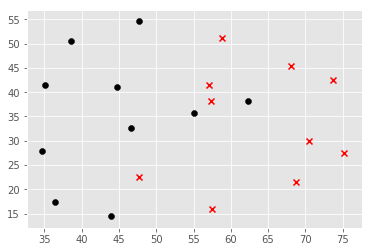



min: 27.0


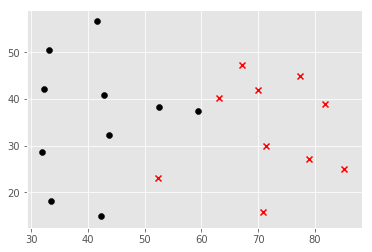



min: 28.0


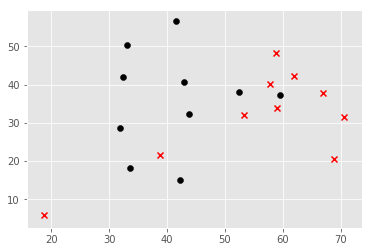



min: 29.0


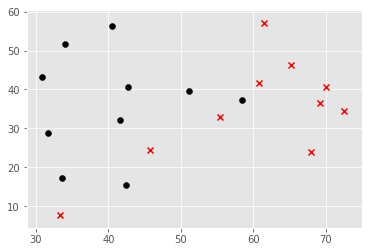



min: 30.0


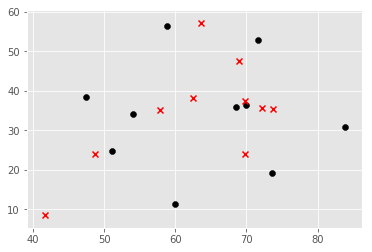



min: 31.0


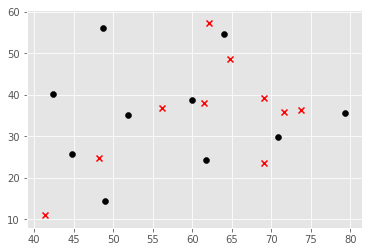



min: 32.0


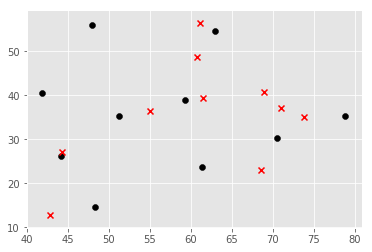



min: 33.0


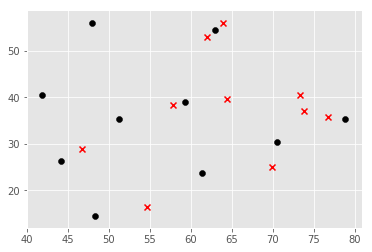



min: 34.0


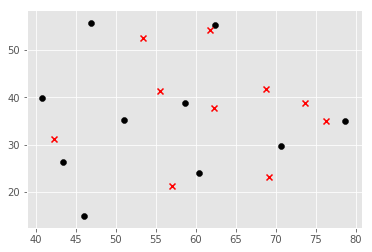



min: 35.0


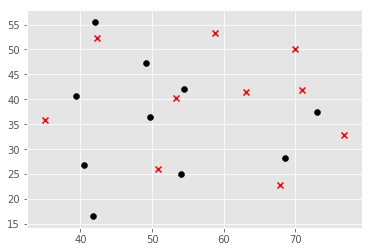



min: 36.0
[ 5.05991333 10.04703333]
[[ 5.05991333e+01  3.21606450e-13 -9.52068149e-14  2.54700296e-14
   0.00000000e+00]
 [ 1.00470333e+02  2.85564741e-13 -8.35195300e-14  2.18680261e-14
   0.00000000e+00]]
[2 0 0 8 0]


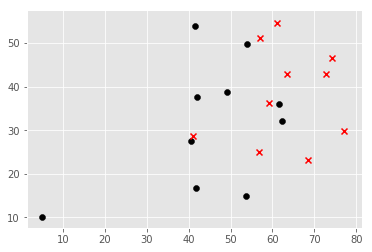



min: 37.0
[36.83475294 17.50953333]
[[ 3.22480339e-13 -9.61255889e-14  2.53013905e-14  5.26653027e-16
   6.26190800e+02]
 [ 2.87471028e-13 -8.55598276e-14  2.11840357e-14  8.23684870e-16
   2.97662067e+02]]
[0 0 8 0 9]


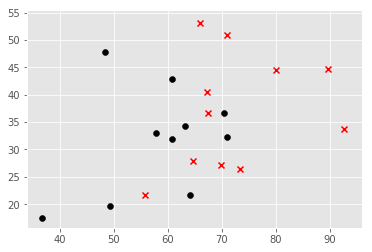



min: 38.0
[34.38839306 42.93297778]
[[-1.20131525e-13  1.11631697e-13  4.21345379e-15  6.26190800e+02
   1.02445207e+03]
 [-9.67726104e-14  6.42480421e-14  2.70337264e-15  2.97662067e+02
   1.76312087e+03]]
[ 0  8  0  9 31]


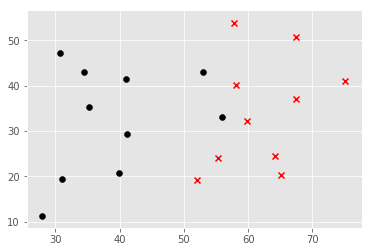



min: 39.0


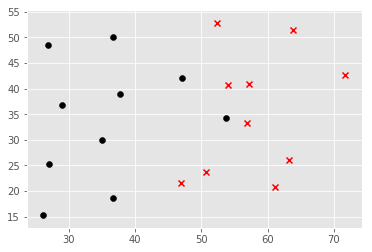



min: 40.0


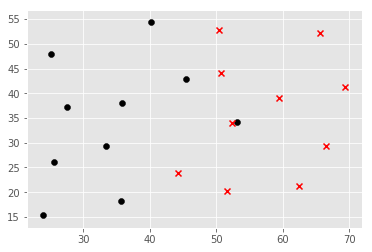



min: 41.0


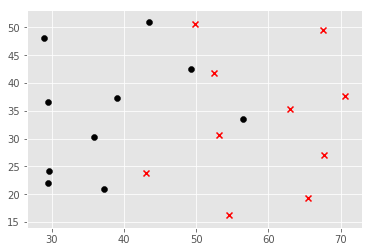



min: 42.0


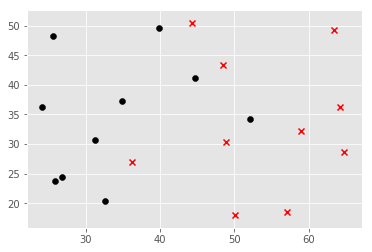



min: 43.0


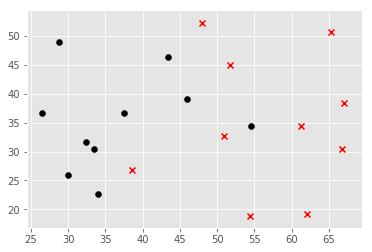



min: 44.0


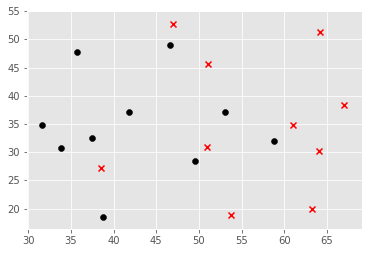



min: 45.0


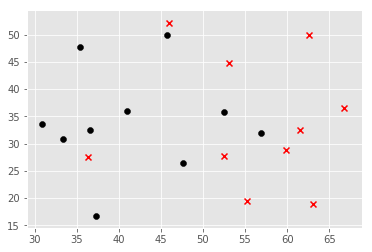



min: 46.0


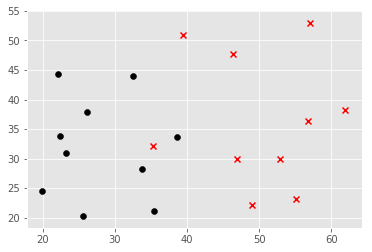



min: 47.0


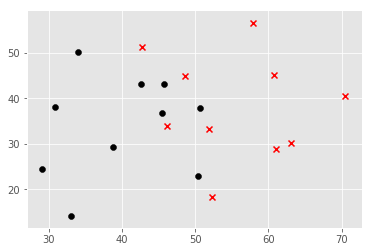



min: 48.0


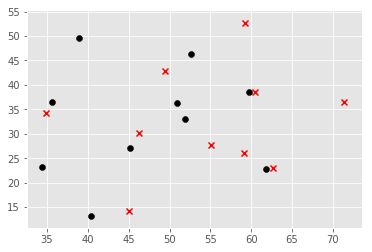



min: 49.0


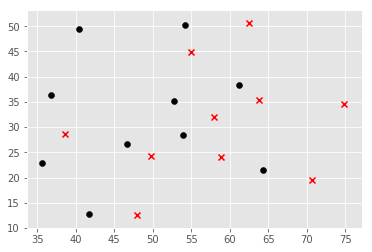



min: 46.0


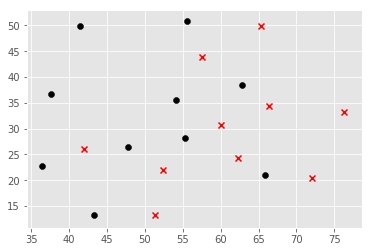



min: 47.0


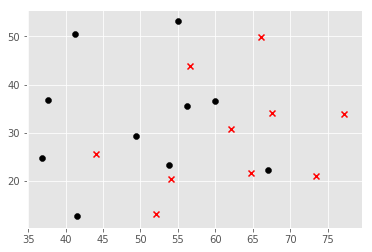



min: 48.0


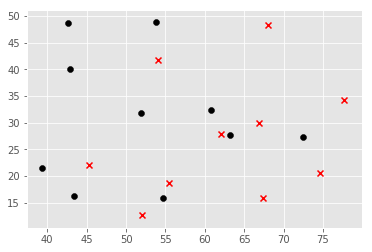



min: 49.0


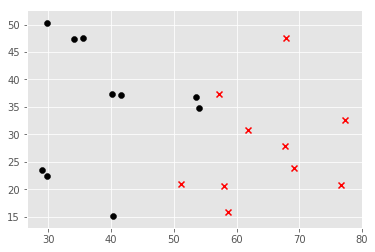



min: 50.0


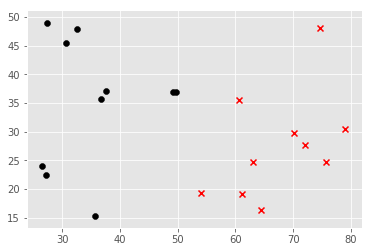



min: 51.0


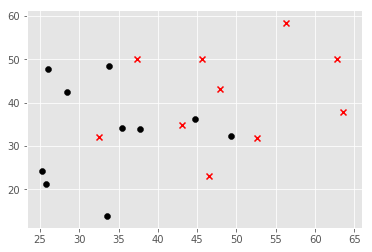



min: 52.0


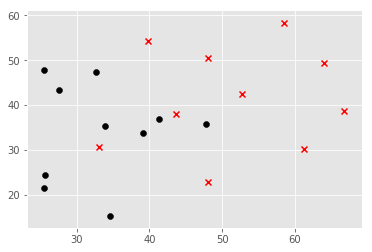



min: 53.0


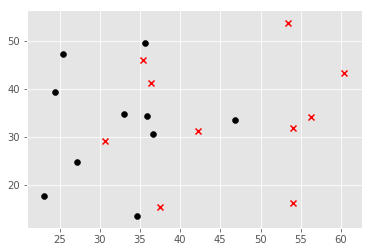



min: 54.0


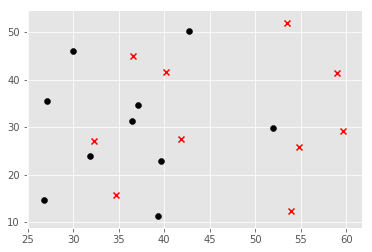



min: 55.0


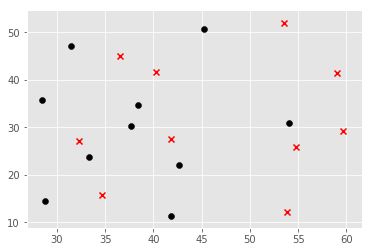



min: 56.0


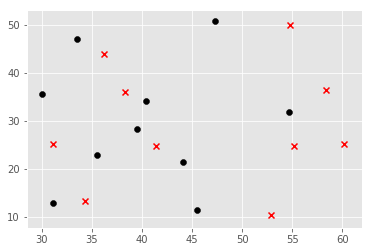



min: 57.0


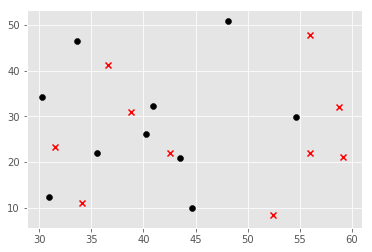



min: 58.0


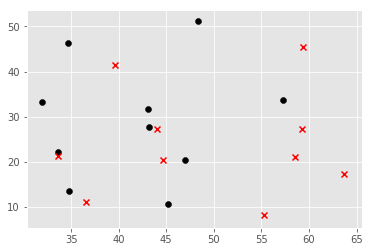



min: 59.0


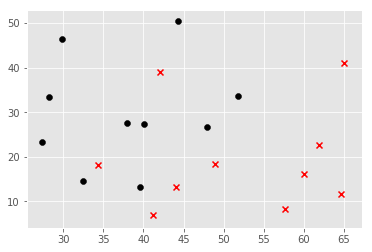



min: 60.0


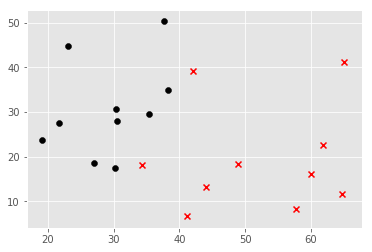



min: 61.0


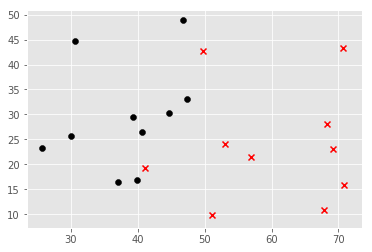



min: 62.0


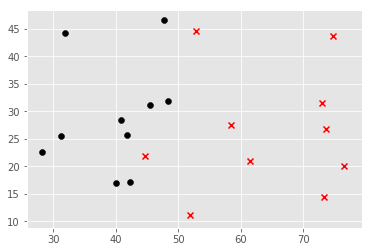



min: 63.0


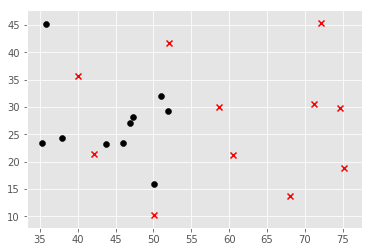



min: 64.0


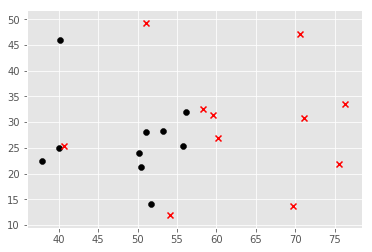



min: 65.0


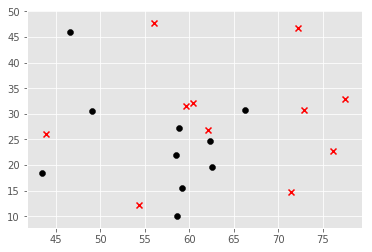



min: 66.0


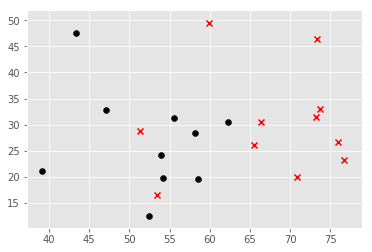



min: 67.0


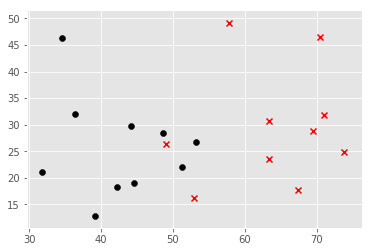



min: 68.0


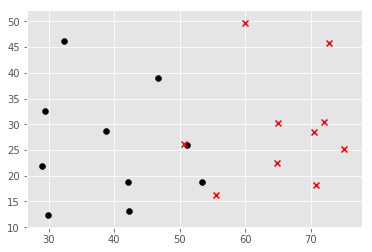



min: 69.0


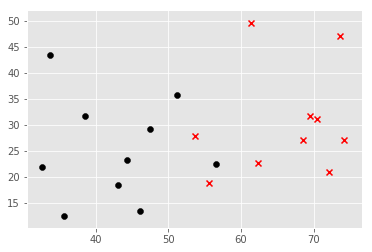



min: 70.0


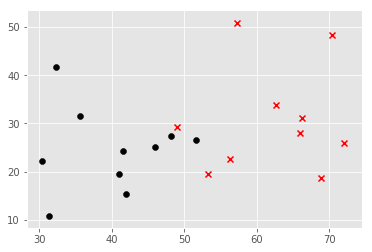



min: 71.0


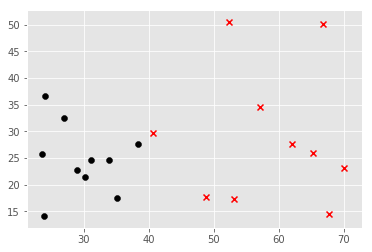



min: 72.0


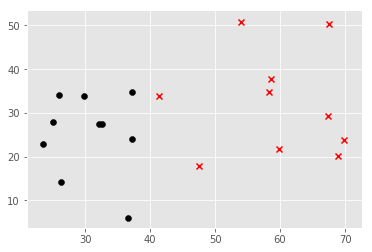



min: 73.0


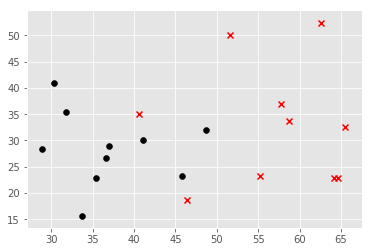



min: 74.0


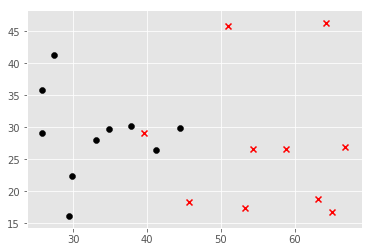



min: 75.0


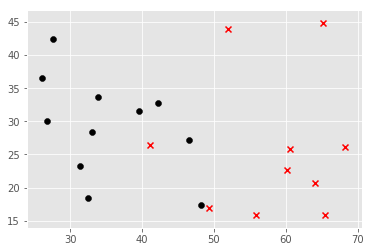



min: 76.0


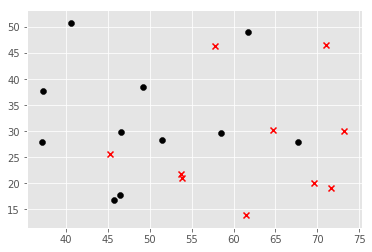



min: 77.0


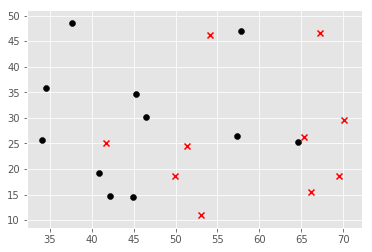



min: 78.0


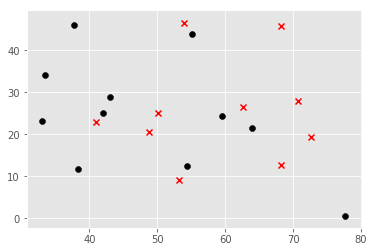



min: 79.0


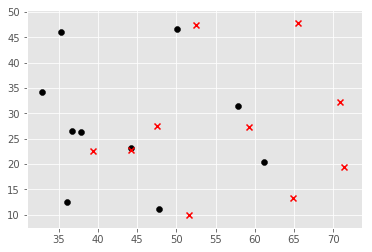



min: 80.0


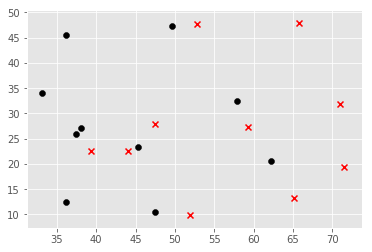



min: 81.0


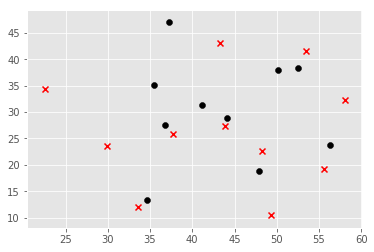



min: 82.0


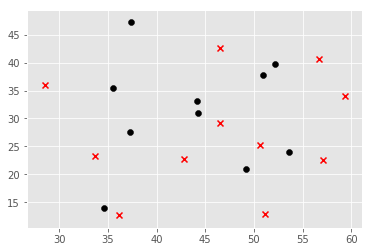



min: 83.0


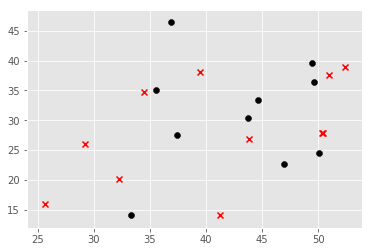



min: 84.0


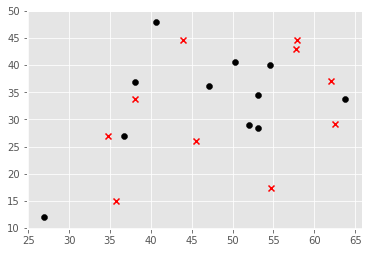



min: 85.0


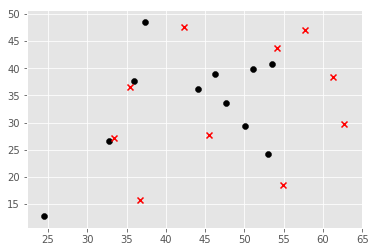



min: 86.0


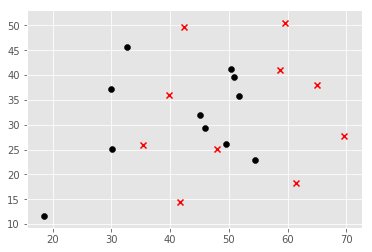



min: 87.0


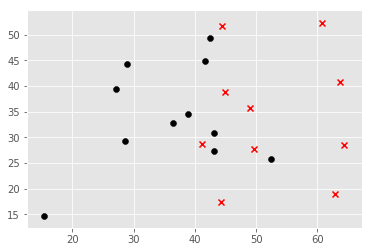



min: 88.0


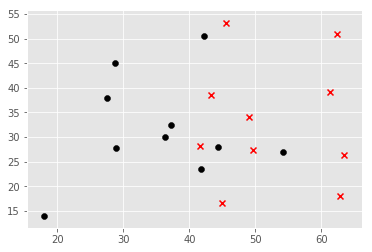



min: 89.0


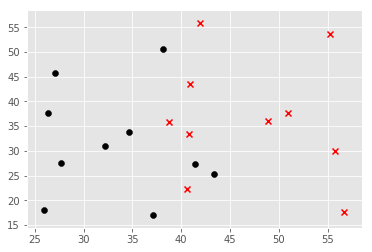



min: 90.0


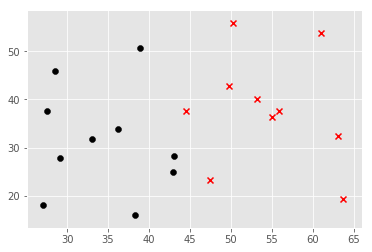



min: 91.0


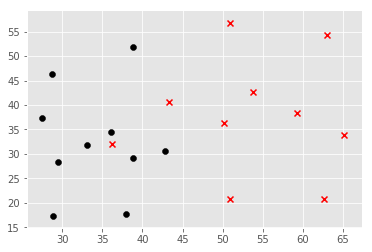



min: 92.0


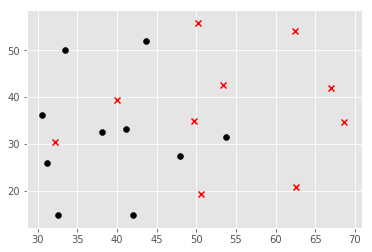



min: 93.0


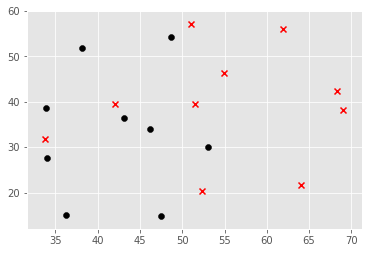



min: 94.0


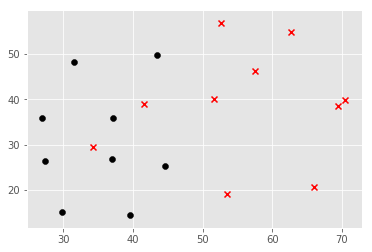

In [57]:


with open('../data/general/matches_2017_2018_v1.json') as matches_json:
    matches_json = pd.read_json(matches_json)
    
matches = [60565]


no_team = 0
home_team = 0
away_team = 0
match_count = 1



data_height = 6000 # number of seconds in per match
data_width = 128 # number of features for fector


for id in matches:
    with open('../data/match_' + str(id) + '/match_data_' + str(id) + '.json', 'r') as file:
        team = json.load(file)
      
        
    # defining 3 distinct id in game
    referee_id = 0
    home_team_id = int(team[1]['teamId'])
    away_team_id = int(team[2]['teamId'])
    
    # home player list
    home_team_player = []
    away_team_player = []
    
    # player dicts
    home_dict = {} 
    away_dict = {} 
    
    # players position ID 
    player_positionId = {'homeTeam' : {}, 'awayTeam' : {}}
    
    
    with open('../data/match_' + str(id) + '/roster_data_' + str(id) + '.json', 'r') as file:
        match_squad = json.load(file)
        
    for roaster in match_squad:
        if roaster['teamId'] == home_team_id:
            home_team_player.append(str(roaster['jerseyNumber']))
            player_positionId['homeTeam'][roaster['jerseyNumber']] = roaster['positionId'] 
            
        elif roaster['teamId'] == away_team_id:
            away_team_player.append(str(roaster['jerseyNumber']))
            player_positionId['awayTeam'][roaster['jerseyNumber']] = roaster['positionId']
            
    
    home_team_player.sort(key=int)
    home_val = np.arange(0, len(home_team_player))
    home_dict = dict(zip(home_team_player, home_val))
    home_dict_reverse = dict(zip(home_val, home_team_player))

    away_team_player.sort(key=int)
    away_val = np.arange(0, len(away_team_player))
    away_dict = dict(zip(away_team_player, away_val))
    away_dict_reverse = dict(zip(away_val, away_team_player))
    
    
    # home and away team player pos and activity count: 0-xpos, 1-ypos
    home_pos_count = np.zeros(shape=(len(home_team_player), 2), dtype=np.float)
    home_activity_count = np.zeros(shape=(len(home_team_player), 1), dtype=np.int)
    away_pos_count = np.zeros(shape=(len(away_team_player), 2), dtype=np.float)
    away_activity_count = np.zeros(shape=(len(away_team_player), 1), dtype=np.int)
 

    # home and away team player count data for 5 min: 0-xpos, 1-ypos / 0-1min, 1-2min... 4-5min 
    home_pos_count_5min = np.zeros(shape=(len(home_team_player), 2, 5), dtype=np.float)
    home_activity_count_5min = np.zeros(shape=(len(home_team_player), 5), dtype=np.int)
    
    away_pos_count_5min = np.zeros(shape=(len(away_team_player), 2, 5), dtype=np.float)
    away_activity_count_5min = np.zeros(shape=(len(away_team_player), 5), dtype=np.int)
    
    
    # home and away team Mean pos data: 0-xpos, 1-ypos
    home_pos_mean = np.zeros(shape=(len(home_team_player), 2), dtype=np.float)
    
    away_pos_mean = np.zeros(shape=(len(away_team_player), 2), dtype=np.float)
    
         
    # create array of x input data for every match
    x_intput = np.ndarray(shape=(data_height, data_width), dtype=np.float)        
            
    with open('../data/match_' + str(id) + '/per_sec_data_' + str(id) + '.json', 'r') as file:
        data_persec = json.load(file)
        
        
    # create first average positon data for assigning player position
    for t in data_persec:
        
        i = int(t['minute'])*60 + int(t['second'])
        x_pos = t['xpos']
        y_pos = t['ypos']
        team_id_t = int(t['teamId'])
        jersey_number_t = int(t['jerseyNumber'])
        has_ball_teamId_t = int(t['hasballTeamId'])
        
        if i==300:
            break
        
        first_5min = math.floor(i/60)
        
        
        
        if team_id_t == home_team_id:
            if player_positionId['homeTeam'][jersey_number_t] == 1:
                home_pos_count_5min[home_dict[str(jersey_number_t)]][0][first_5min] += x_pos
                home_pos_count_5min[home_dict[str(jersey_number_t)]][1][first_5min] += y_pos
                home_activity_count_5min[home_dict[str(jersey_number_t)]][first_5min] +=1 
            
            elif has_ball_teamId_t == away_team_id:
                home_pos_count_5min[home_dict[str(jersey_number_t)]][0][first_5min] += x_pos
                home_pos_count_5min[home_dict[str(jersey_number_t)]][1][first_5min] += y_pos
                home_activity_count_5min[home_dict[str(jersey_number_t)]][first_5min] +=1
        
        elif team_id_t == away_team_id:
            if player_positionId['awayTeam'][jersey_number_t] == 1:
                away_pos_count_5min[away_dict[str(jersey_number_t)]][0][first_5min] += x_pos
                away_pos_count_5min[away_dict[str(jersey_number_t)]][1][first_5min] += y_pos
                away_activity_count_5min[away_dict[str(jersey_number_t)]][first_5min] +=1 
            
            elif has_ball_teamId_t == home_team_id:
                away_pos_count_5min[away_dict[str(jersey_number_t)]][0][first_5min] += x_pos
                away_pos_count_5min[away_dict[str(jersey_number_t)]][1][first_5min] += y_pos
                away_activity_count_5min[away_dict[str(jersey_number_t)]][first_5min] +=1

    print(home_dict)
    print(home_dict_reverse)   
    print('\n')
    
    print(away_dict)
    print(away_dict_reverse)
    
    
    for player_home in range(0, len(home_team_player)):
        count = 0
        for minutes in range(0,5):
            home_pos_mean[player_home][0] += home_pos_count_5min[player_home][0][minutes]
            home_pos_mean[player_home][1] += home_pos_count_5min[player_home][1][minutes]
            count += home_activity_count_5min[player_home][minutes]

        if count!=0:
            home_pos_mean[player_home][0] /= count
            home_pos_mean[player_home][1] /= count
        else:
            home_pos_mean[player_home][0] = 0 
            home_pos_mean[player_home][1] = 0
            
    for player_away in range(0, len(away_team_player)):
        count = 0
        for minutes in range(0,5):
            away_pos_mean[player_away][0] += away_pos_count_5min[player_away][0][minutes]
            away_pos_mean[player_away][1] += away_pos_count_5min[player_away][1][minutes]
            count += away_activity_count_5min[player_away][minutes]

        if count!=0:
            away_pos_mean[player_away][0] /= count
            away_pos_mean[player_away][1] /= count
        else:
            away_pos_mean[player_away][0] = 0 
            away_pos_mean[player_away][1] = 0
            
                             
                                                      
    #print(home_pos_mean)
    #print(away_pos_mean)
    home_pos_mean = np.zeros(shape=(len(home_team_player), 2), dtype=np.float)
    away_pos_mean = np.zeros(shape=(len(away_team_player), 2), dtype=np.float)
    
    # temporary t        
    tmp_t = 0 
        
    for d in data_persec:
        
        
        i = int(d['minute'])*60 + int(d['second'])
        x_pos = d['xpos']
        y_pos = d['ypos']
        team_id_t = int(d['teamId'])
        jersey_number_t = int(d['jerseyNumber'])
        has_ball_teamId_t = int(d['hasballTeamId'])
        
        
        # shifing last index of 5min arry (period of 5min) with last min data
        # and calculate mena position of each player each min based on previus 5 min
        if (i+1)%60 == 0 and tmp_t != i+1 and i>299:
            
            tmp_t = i+1
            
            home_pos_mean = np.zeros(shape=(len(home_team_player), 2), dtype=np.float)
            away_pos_mean = np.zeros(shape=(len(away_team_player), 2), dtype=np.float)
            
            
            for player_home in range(0, len(home_team_player)):
                count = 0
                for minutes in range(0,5):
                    home_pos_mean[player_home][0] += home_pos_count_5min[player_home][0][minutes]
                    home_pos_mean[player_home][1] += home_pos_count_5min[player_home][1][minutes]
                    count += home_activity_count_5min[player_home][minutes]

                if count!=0:
                    home_pos_mean[player_home][0] /= count
                    home_pos_mean[player_home][1] /= count
                else:
                    home_pos_mean[player_home][0] = 0 
                    home_pos_mean[player_home][1] = 0
            
            for player_away in range(0, len(away_team_player)):
                count = 0
                for minutes in range(0,5):
                    away_pos_mean[player_away][0] += away_pos_count_5min[player_away][0][minutes]
                    away_pos_mean[player_away][1] += away_pos_count_5min[player_away][1][minutes]
                    count += away_activity_count_5min[player_away][minutes]

                if count!=0:
                    away_pos_mean[player_away][0] /= count
                    away_pos_mean[player_away][1] /= count
                else:
                    away_pos_mean[player_away][0] = 0 
                    away_pos_mean[player_away][1] = 0
            
                
            print("min: " + str((i+1)/60))
            
            for i_pos in range(0, len(home_pos_mean)):
                jersey_n = home_dict_reverse[i_pos]
                if player_positionId['homeTeam'][int(jersey_n)] == 1:
                    pass
                elif home_pos_mean[i_pos][0]!=0 and home_pos_mean[i_pos][1]!=0:
                     plt.scatter(home_pos_mean[i_pos][0], home_pos_mean[i_pos][1], marker="o", color="k", linewidths=0.5)
                        
            for i_pos in range(0, len(away_pos_mean)):
                jersey_n = away_dict_reverse[i_pos]
                if player_positionId['awayTeam'][int(jersey_n)] == 1:
                    pass
                elif away_pos_mean[i_pos][0]!=0 and away_pos_mean[i_pos][1]!=0:
                     plt.scatter(away_pos_mean[i_pos][0], away_pos_mean[i_pos][1], marker="x", color="r", linewidths=0.5)
           
            
            plt.show()
            print('\n')        
            
            
            for player_home in range(0, len(home_team_player)):
                home_pos_count_5min[player_home][0] = (shift(home_pos_count_5min[player_home][0], -1, cval=0))
                home_pos_count_5min[player_home][1] = (shift(home_pos_count_5min[player_home][1], -1, cval=0))
                home_activity_count_5min[player_home] = (shift(home_activity_count_5min[player_home], -1, cval=0))

                home_pos_count_5min[player_home][0][4] = home_pos_count[player_home][0]
                home_pos_count_5min[player_home][1][4] = home_pos_count[player_home][1]
                home_activity_count_5min[player_home][4] = home_activity_count[player_home]
                
            for player_away in range(0, len(away_team_player)):
                away_pos_count_5min[player_away][0] = (shift(away_pos_count_5min[player_away][0], -1, cval=0))
                away_pos_count_5min[player_away][1] = (shift(away_pos_count_5min[player_away][1], -1, cval=0))
                away_activity_count_5min[player_away] = (shift(away_activity_count_5min[player_away], -1, cval=0))

                away_pos_count_5min[player_away][0][4] = away_pos_count[player_away][0]
                away_pos_count_5min[player_away][1][4] = away_pos_count[player_away][1]
                away_activity_count_5min[player_away][4] = away_activity_count[player_away]
                
            

            # clear home team
            home_pos_count = np.zeros(shape=(len(home_team_player), 2), dtype=np.float)
            home_activity_count = np.zeros(shape=(len(home_team_player), 1), dtype=np.int)


            # clear away team
            away_pos_count = np.zeros(shape=(len(away_team_player), 2), dtype=np.float)
            away_activity_count = np.zeros(shape=(len(away_team_player), 1), dtype=np.int)
            
    
        # getting players' and  referee's x,y coordinate on the pitch
        
        if team_id_t == home_team_id:
            if player_positionId['homeTeam'][jersey_number_t] == 1:
                home_pos_count[home_dict[str(jersey_number_t)]][0] += x_pos
                home_pos_count[home_dict[str(jersey_number_t)]][1] += y_pos
                home_activity_count[home_dict[str(jersey_number_t)]] +=1  
            
            elif has_ball_teamId_t == away_team_id:
                home_pos_count[home_dict[str(jersey_number_t)]][0] += x_pos
                home_pos_count[home_dict[str(jersey_number_t)]][1] += y_pos
                home_activity_count[home_dict[str(jersey_number_t)]] +=1 

        elif team_id_t == away_team_id:
            if player_positionId['awayTeam'][jersey_number_t] == 1:
                away_pos_count[away_dict[str(jersey_number_t)]][0] += x_pos
                away_pos_count[away_dict[str(jersey_number_t)]][1] += y_pos
                away_activity_count[away_dict[str(jersey_number_t)]] +=1  
            
            elif has_ball_teamId_t == home_team_id:
                away_pos_count[away_dict[str(jersey_number_t)]][0] += x_pos
                away_pos_count[away_dict[str(jersey_number_t)]][1] += y_pos
                away_activity_count[away_dict[str(jersey_number_t)]] +=1 

        elif team_id_t == referee_id:
            pass
            # referee_pos_t['xpos']
            # referee_pos_t['ypos']
        
        
        if has_ball_teamId_t == 0:
            pass
        else: 
            pass
        
    

If one player previous and last avrg activity_counts are equal and the number of non-zero player in activity_count_all vector has been cahnged then it implies that the player is substituted, we should eliminate it from our system. Set all vectors zero.